<a href="https://colab.research.google.com/github/maggiecrowner/labs_fork/blob/main/4HedonicPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hedonic Pricing Lab - Maggie Crowner

In [2]:
! git clone https://github.com/DS3001/labs

Cloning into 'labs'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 80 (delta 28), reused 30 (delta 18), pack-reused 31 (from 1)
Receiving objects: 100% (80/80), 20.54 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

##Part 1

In [36]:
cars = pd.read_csv("/content/labs/04_hedonic_pricing/cars_hw.csv")
display(cars)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [9]:
print(cars.dtypes)
cars = cars.drop(cars.columns[0], axis=1)

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object


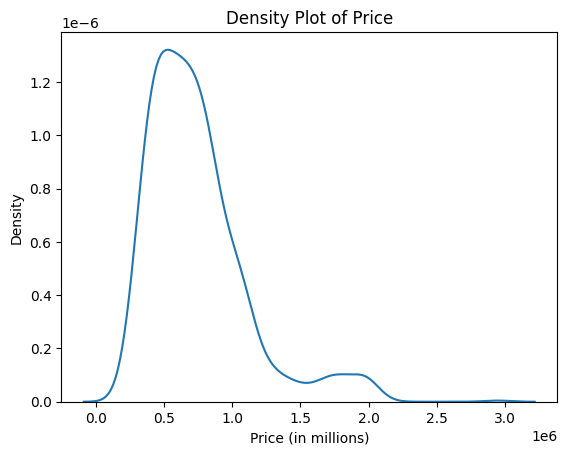

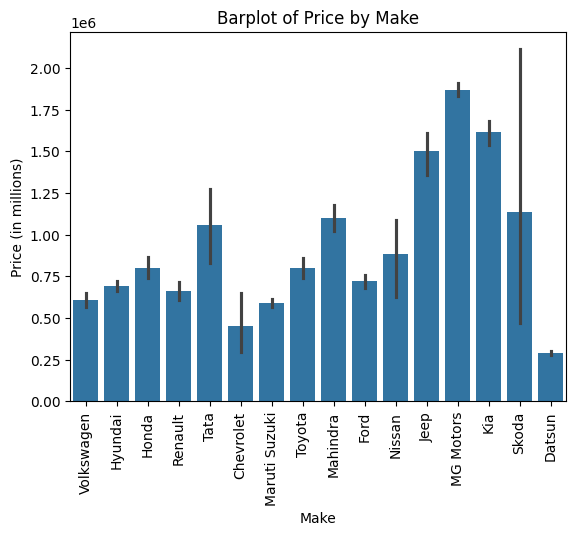

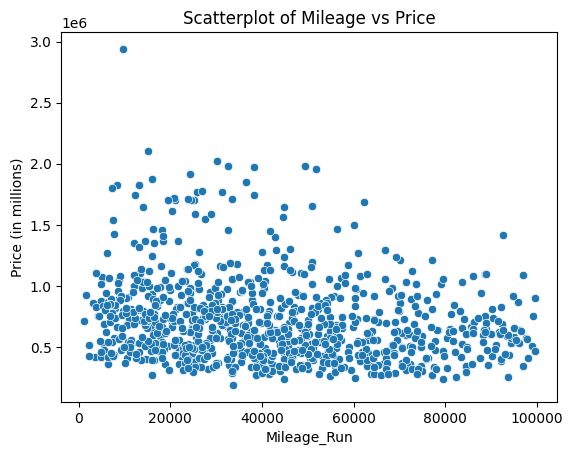

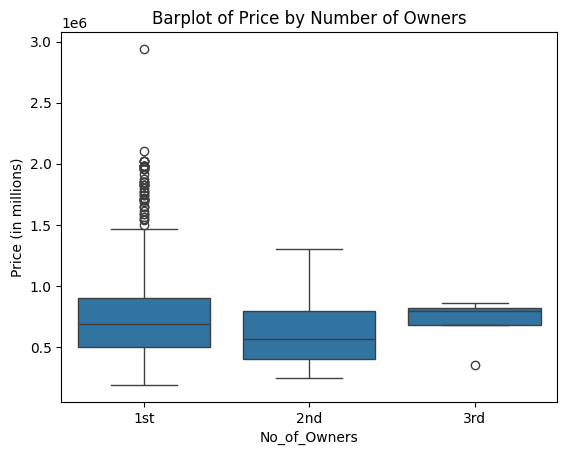

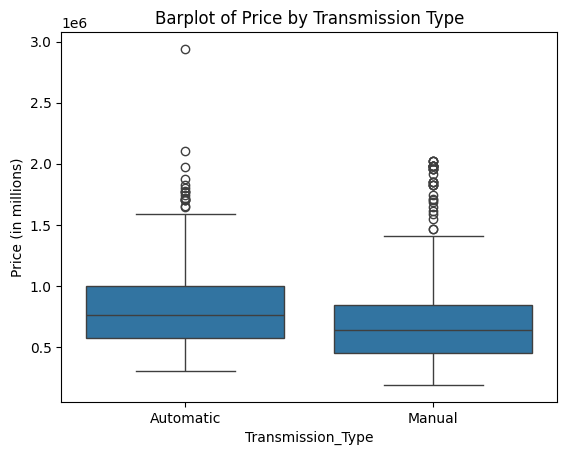

In [44]:
sns.kdeplot(x=cars['Price'])
plt.title('Density Plot of Price')
plt.xlabel('Price (in millions)')
plt.show()

sns.barplot(x=cars['Make'], y=cars['Price'])
plt.title('Barplot of Price by Make')
plt.ylabel('Price (in millions)')
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x=cars['Mileage_Run'], y=cars['Price'])
plt.title('Scatterplot of Mileage vs Price')
plt.ylabel('Price (in millions)')
plt.show()

sns.boxplot(x=cars['No_of_Owners'], y=cars['Price'])
plt.title('Barplot of Price by Number of Owners')
plt.ylabel('Price (in millions)')
plt.show()

sns.boxplot(x=cars['Transmission_Type'], y=cars['Price'])
plt.title('Barplot of Price by Transmission Type')
plt.ylabel('Price (in millions)')
plt.show()

##Part 2

In [47]:
make_dummy = pd.get_dummies(cars['Make'], dtype='int', drop_first=True)
color_dummy = pd.get_dummies(cars['Color'], dtype='int', drop_first=True)
body_dummy = pd.get_dummies(cars['Body_Type'], dtype='int', drop_first=True)
owners_dummy = pd.get_dummies(cars['No_of_Owners'], dtype='int', drop_first=True)
fuel_dummy = pd.get_dummies(cars['Fuel_Type'], dtype='int', drop_first=True)
tran_dummy = pd.get_dummies(cars['Transmission'], dtype='int', drop_first=True)
TT_dummy = pd.get_dummies(cars['Transmission_Type'], dtype='int', drop_first=True)

##Part 3

In [64]:
y = cars['Price']
x = pd.concat([make_dummy, color_dummy, body_dummy, owners_dummy, fuel_dummy, tran_dummy, TT_dummy,
               cars['Make_Year'], cars['Seating_Capacity'], cars['Mileage_Run']], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    random_state=100)

##Part 4

In [65]:
# Price on Mileage_Run
y = y_train
x = pd.DataFrame(x_train['Mileage_Run'])
x_t = pd.DataFrame(x_test['Mileage_Run'])
y_t = y_test
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
y_hat = lm.predict(x_t)
print('R^2: ', lm.score(x_t,y_t))
print('R^2 train: ', lm.score(x,y))
rmse = np.sqrt(np.mean((y_t - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.016246470464106877
R^2 train:  0.03172333587293674
RMSE:  367530.1613194705


,Variable,Coefficient
0,Mileage_Run,-2.667905


In [66]:
# Price on Make_Year
y = y_train
x = pd.DataFrame(x_train['Make_Year'])
x_t = pd.DataFrame(x_test['Make_Year'])
y_t = y_test
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
y_hat = lm.predict(x_t)
print('R^2: ', lm.score(x_t,y_t))
print('R^2 train: ', lm.score(x,y))
rmse = np.sqrt(np.mean((y_t - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.2895323027101395
R^2 train:  0.2758761342527142
RMSE:  312335.96957018087


,Variable,Coefficient
0,Make_Year,67298.144305


In [67]:
# Price on Seating_Capacity
y = y_train
x = pd.DataFrame(x_train['Seating_Capacity'])
x_t = pd.DataFrame(x_test['Seating_Capacity'])
y_t = y_test
lm = linear_model.LinearRegression(fit_intercept=True).fit(x,y)
y_hat = lm.predict(x_t)
print('R^2: ', lm.score(x_t,y_t))
print('R^2 train: ', lm.score(x,y))
rmse = np.sqrt(np.mean((y_t - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.0011115897738707137
R^2 train:  0.006008919894476716
RMSE:  370346.5646970541


,Variable,Coefficient
0,Seating_Capacity,62960.84201


Although none of these models appear to perform very well (which makes sense since I would doubt that any of these predictors are super heavily correlated with price), the model of Price on Make_Year performs the best, as it has the lowest RMSE and the highest R^2.

##Part 5

In [68]:
# Price on everything, including dummy variables and interactions
cars['BodyXColor'] = cars['Body_Type']+'X'+cars['Color']
BxC_dummy = pd.get_dummies(cars['BodyXColor'], dtype='int', drop_first=True)
cars['TranXType'] = cars['Transmission']+'X'+cars['Transmission_Type']
TxTT_dummy = pd.get_dummies(cars['TranXType'], dtype='int', drop_first=True)

y = cars['Price']
x = pd.concat([make_dummy, owners_dummy, fuel_dummy,
               cars['Make_Year'], cars['Seating_Capacity'], cars['Mileage_Run'],
               BxC_dummy, TxTT_dummy], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    random_state=100)

lm = linear_model.LinearRegression(fit_intercept=True).fit(x_train,y_train)
y_hat = lm.predict(x_test)
print('R^2: ', lm.score(x_test,y_test))
print('R^2 train: ', lm.score(x_train,y_train))
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print('RMSE: ', rmse)
results = pd.DataFrame({'Variable': lm.feature_names_in_, 'Coefficient': lm.coef_})
results

R^2:  0.8603644740940777
R^2 train:  0.8553586328865831
RMSE:  138467.4823910165


,Variable,Coefficient
0,Datsun,-24598.909278
1,Ford,36289.461731
2,Honda,161273.221647
3,Hyundai,160241.657996
4,Jeep,357023.291380
...,...,...
76,6-SpeedXAutomatic,65225.129186
77,6-SpeedXManual,119327.692086
78,7-SpeedXAutomatic,382317.398163
79,7-SpeedXManual,221134.741386


This model has a way higher R^2 value and a way lower RMSE value. Thus, this model is a much better fit for prediction. However, there are 81 predictors in this model since I included all predictors and interactions, and there were also a lot of dummy variables. This is fine for the sake of this prediction, but the model itself is not very interpretable, as you could not succinctly explain what a given coefficient means. Going forward, it is better to eliminate most of these predictors and just use the ones that are the most influential in the model.

##Part 6

I don't believe Part 5 is a case of overfitting, since the R^2 value is pretty high on both the training set and the test set and essentially equal between the two sets. It is just really complicated and hard to interpret. However, Part 4 shows two very clear examples of underfitting, in the Price on Mileage_Run model and the Price on Seating_Capacity model. These models have R^2 values for the training sets which are much higher than the R^2 values for the test sets, which means that this model is really not useful for prediction beyond the sample we currently have. This shows underfitting, and there should be more predictors in the model. It is important to test out several different models to determine which one is the most accurate when building a model for prediction.